**Έστω δυο κατηγορίες ω1 και ω2 , των οποίων τα δείγματα σε 2-διαστάσεις ακολουθούν κατανομές των οποίων τα χαρακτηριστικά δίνονται.**

**Γράψτε κώδικα ώστε να παράξετε 150 τυχαία δείγματα από καθεμία από αυτές τις κατηγορίες και απεικονίστε τα δείγματα κατάλληλα ώστε να διακρίνονται οι κλάσεις.**

Αρχικά, εισάγω τα δεδομένα μου και δημιουργώ 150 τυχαία δείγματα που ακολουθούν τις δοθείσες κατανομές και τα απεικονίζω στο πρώτο διάγραμμα.

In [151]:
import numpy as np
# np.random.seed(39)

means = [[2, 2], [-8, 2]]
covariances = [[[2, -0.5], [-0.5, 1]],

               [[1,  0.5], [ 0.5, 1]]]

distributions = []
for mean, cov in zip(means, covariances):
    # κάθε κατανομή αποτελείται από 150 δείγματα
    distribution = np.random.multivariate_normal(mean, cov, 150)
    distributions.append(distribution)

# distributions[0] ---> ω1 και distributions[1] ---> ω2
del distribution

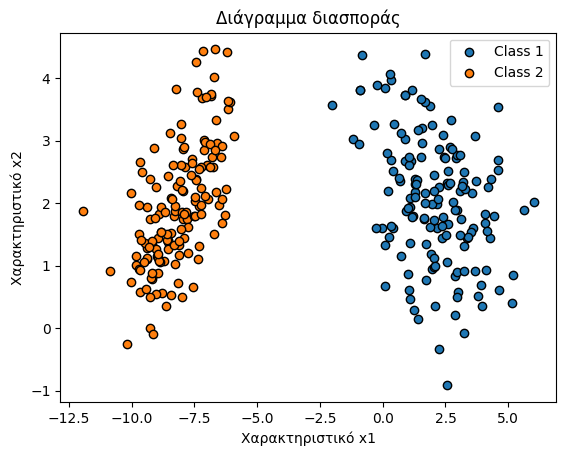

In [152]:
import matplotlib.pyplot as plt

samples1 = distributions[0]
samples2 = distributions[1]

plt.figure()
plt.scatter(samples1[:, 0], samples1[:, 1], edgecolors='k', label='Class 1')
plt.scatter(samples2[:, 0], samples2[:, 1], edgecolors='k', label='Class 2')

plt.title('Διάγραμμα διασποράς')
plt.xlabel('Χαρακτηριστικό x1')
plt.ylabel('Χαρακτηριστικό x2')
plt.legend()
plt.show()

# **Ερώτημα Α**

**Υλοποιείστε τον αλγόριθμό του Batch Perceptron και με αυτόν υπολογίστε έναν γραμμικό ταξινομητή για τις κλάσεις αυτές. Απεικονίστε την επιφάνεια απόφασης που προέκυψε επάνω στο προηγούμενο γράφημα.**

Ο αλγόριθμος Batch Perceptron είναι μια παραλλαγή του αλγορίθμου του Perceptron και χρησιμοποιείται για επιβλεπόμενη ταξινόμηση (supervised classification), δηλαδή για να αποφασίσει σε ποιά κλάση ανήκει ένα νέο δείγμα. Ο αλγόριθμος αυτός βρίσκει ένα γραμμικό επίπεδο το οποίο διαχωρίζει τα δείγματα σε δύο κλάσεις.

Ο όρος "Batch" αναφέρεται στη μέθοδο ενημέρωσης των βαρών κατά την εκπαίδευση του αλγορίθμου. Αν ένα δείγμα ταξινομηθεί σωστά, τότε τα βάρη δεν αλλάζουν. Αν ταξινομηθεί λανθασμένα, τα βάρη ενημερώνονται σύμφωνα με τον τύπο που αναφέρεται στο report μετά από την εξέταση όλων των δειγμάτων στο σύνολο δεδομένων, αντί για κάθε επιμέρους δείγμα.

Οι τιμές των παραμέτρων του αλγορίθμου αιτιολογούνται στο report.

In [153]:
def batch_perceptron(X, y, learning_rate=0.01, epochs=100):
    weights = np.random.uniform(-0.5, 0.5, X.shape[1])
    bias = 0

    for epoch in range(epochs):
        weight_update = np.zeros(X.shape[1])
        bias_update = 0

        for i in range(X.shape[0]):
            prediction = np.dot(X[i], weights) + bias
            if y[i] * prediction <= 0:       # έλεγχος ορθής ή λάθους ταξινόμησης
                weight_update += y[i] * X[i] # Ενημερώστε για λάθος ταξινομήσεις
                bias_update += y[i]

        weights += learning_rate * weight_update
        bias += learning_rate * bias_update
    return weights, bias

Η παρούσα υλοποίηση χρειάζεται ενοποιημένο το σύνολο των δεδομένων καθώς και τις πραγματικές ετικέτες.

Ετικέτες με την τιμή 1 συμβολίζουν ότι το δείγμα ανήκει στην κλάση ω1, ενώ η τιμή -1 συμβολίζει ότι το δείγμα ανήκει στην κλάση ω2. Ο συμβολισμός αυτός εξυπηρετεί την άμεση εημέρωση των βαρών και του κατωφλίου.

In [154]:
X = np.vstack((distributions[0], distributions[1]))

# Ετικέτες: +1 για την ω1, -1 για την ω2
y = np.hstack((np.ones(distributions[0].shape[0]), -1*np.ones(distributions[1].shape[0])))

weights, bias = batch_perceptron(X, y)

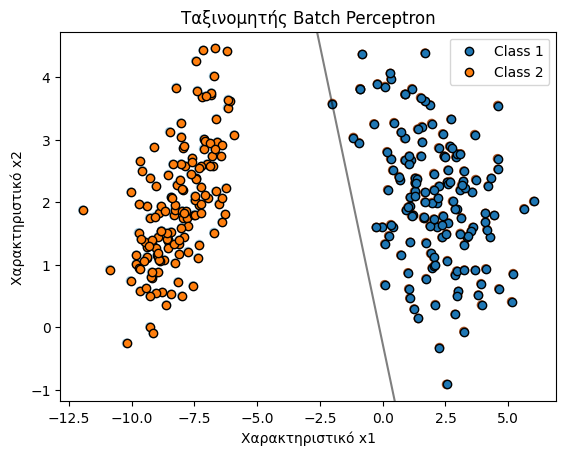

In [155]:
# Δημιουργία διαγράμματος διασποράς
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
# Σχεδιασμός περιγραμμάτων και προσδιορισμός ετικετών (Βοηθάει στην οπτικοποίηση)
plt.scatter(samples1[:, 0], samples1[:, 1], edgecolors='k', label='Class 1')
plt.scatter(samples2[:, 0], samples2[:, 1], edgecolors='k', label='Class 2')

# Όρια διαγράμματος
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Δημιουργία πλέγματος
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Υπολογισμός συνάρτησης απόφασης για κάθε σημείο του πλέγματος με Batch Perseptron
Z = np.dot(xy, weights) + bias
Z = Z.reshape(XX.shape)

# Απεικόνιση γραμμών απόφασης και περιγράμματος
plt.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

# Σχεδίαση των δεδομένων
plt.title('Ταξινομητής Batch Perceptron')
plt.xlabel('Χαρακτηριστικό x1')
plt.ylabel('Χαρακτηριστικό x2')
plt.legend()

plt.show()

# **Ερώτημα Β**

**Χρησιμοποιείστε γραμμικό SVM (από κατάλληλη βιβλιοθήκη της επιλογής σας)
για να υπολογίσετε έναν νέο γραμμικό ταξινομητή για τα ίδια δεδομένα.
Απεικονίστε τα δεδομένα, τα support vectors και το επίπεδο απόφασης σε νέο
διάγραμμα.**

Ο ταξινομητής SVM (Support Vector Machine) είναι ένας δημοφιλής αλγόριθμος μηχανικής μάθησης, ο οποίος χρησιμοποιείται για ταξινόμηση και παλινδρόμηση. Η κύρια ιδέα του γραμμικού SVM είναι να βρει το βέλτιστο γραμμικό επίπεδο που διαχωρίζει τα δεδομένα σε δύο κατηγορίες. Επομένως, είναι ιδιαίτερα αποτελεσματικός σε προβλήματα δυαδικής ταξινόμησης.

Ο SVM στοχεύει στον εντοπισμό ενός γραμμικού υπερεπιπέδου που διαχωρίζει τα δεδομένα σε δύο κλάσεις. Στον διδιάστατο χώρο, αυτό το υπερεπίπεδο είναι μια γραμμή. Τα δεδομένα που βρίσκονται πλησιέστερα στο διαχωριστικό επίπεδο και καθορίζουν τη θέση και την προσανατολισμό του ονομάζονται διανύσματα υποστήριξης (support vectors). Ο γραμμικός SVM επιδιώκει να μεγιστοποιήσει το περιθώριο μεταξύ των δύο κλάσεων, δηλαδή την απόσταση μεταξύ του διαχωριστικού επιπέδου και των support vectors.


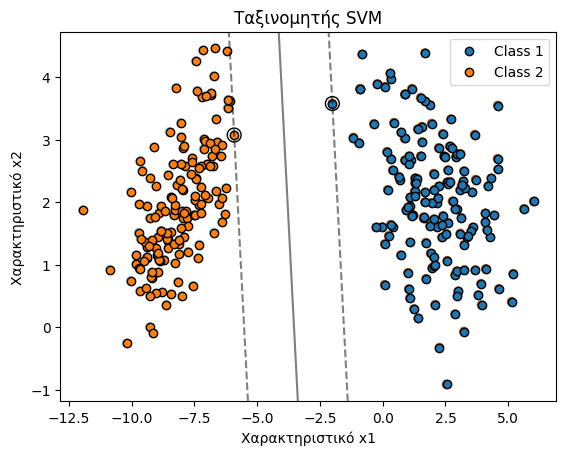

In [156]:
from sklearn.svm import SVC

# Δημιουργία και εκπαίδευση γραμμικού SVM ταξινομητή
svc = SVC(kernel='linear')
svc.fit(X, y)

# Απεικονιση δεδομένων και περιοχών απόφασης
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
# Σχεδιασμός περιγραμμάτων και προσδιορισμός ετικετών (Βοηθάει στην οπτικοποίηση)
plt.scatter(samples1[:, 0], samples1[:, 1], edgecolors='k', label='Class 1')
plt.scatter(samples2[:, 0], samples2[:, 1], edgecolors='k', label='Class 2')

# Όρια διαγράμματος
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Δημιουργία πλέγματος
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Υπολογισμός συνάρτησης απόφασης για κάθε σημείο του πλέγματος με SVM
Z = svc.decision_function(xy).reshape(XX.shape)

# Σχεδιασμός των γραμμών απόφασης και των περιθωρίων
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Σχεδιασμός των διανυσμάτων υποστήριξης
ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.title('Ταξινομητής SVM')
plt.xlabel('Χαρακτηριστικό x1')
plt.ylabel('Χαρακτηριστικό x2')
plt.legend()

plt.show()